## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from ax.service.ax_client import AxClient, ObjectiveProperties
import matplotlib.pyplot as plt

## Define the Objectives

In [74]:
obj1_name = "UltimateTensileStrength"
obj2_name = "YieldStrength"
obj3_name = "ElasticModulus"


## Read the training data

In [75]:
# Define the training data
# read the training data from a CSV file
data = pd.read_csv("training_data.csv")

## Set up the AX Experiment

In [80]:

# set the number of training samples to the number of rows 
# in the training data

n_train = data.shape[0]

ax_client = AxClient(verbose_logging=False)

ax_client.create_experiment(
    parameters=[
        {"name": "WallThickness", "type": "range", "bounds": [0.4, 2.0]},
        {"name": "PrintSpeed", "type": "range", "bounds": [20.0, 100.0]},
        {"name": "LayerHeight", "type": "range", "bounds": [0.1, 0.4]},
        {"name": "Infill%", "type": "range", "bounds": [10.0, 100.0]},
        {"name": "NozzleTemp", "type": "range", "bounds": [1.0, 100.0]},
        {"name": "BedTemp", "type": "range", "bounds": [0.0, 110.0]},
        {"name": "FanSpeed", "type": "range", "bounds": [0.0, 100.0]},
        {"name": "RetractionDistance", "type": "range", "bounds": [0.5, 6.0]},
        {
            "name": "Material",
            "type": "choice",
            "is_ordered": False,
            "values": ["PLA", "ABS", "TPU", "PETG"],
        },
        {
            "name": "InfillPattern",
            "type": "choice",
            "is_ordered": False,
            "values": ["Quarter Cubic", "Gyroid", "Cubic", "Octet", "Tri-Hexagon", "Concentric", "Cross", "Grid", "Cubic Subdivision", "Cross 3D", "Triangle"],
        },
    ],
    objectives={
        obj1_name: ObjectiveProperties(minimize=True),
        obj2_name: ObjectiveProperties(minimize=True),
        obj3_name: ObjectiveProperties(minimize=True),
    },
)

# Add existing data to the AxClient
for i, row in data.iterrows():
    parameters = {"Material": row['Material'],
                  "InfillPattern": row['InfillPattern'],
                  "WallThickness": row['WallThickness'],
                  "PrintSpeed": row['PrintSpeed'],
                  "LayerHeight": row['LayerHeight'],
                  "Infill%": row['Infill%'],
                  "NozzleTemp": row['NozzleTemp'],
                  "BedTemp": row['BedTemp'],
                  "FanSpeed": row['FanSpeed'],
                  "RetractionDistance": row['RetractionDistance']}
    
    UTS = row[obj1_name]
    YS = row[obj2_name] 
    EM = row[obj3_name]
    ax_client.attach_trial(parameters)
    ax_client.complete_trial(trial_index=i, raw_data={obj1_name: UTS, obj2_name: YS, obj3_name: EM})



[INFO 04-17 12:33:55] ax.service.utils.instantiation: Due to non-specification, we will use the heuristic for selecting objective thresholds.
[INFO 04-17 12:33:55] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter WallThickness. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 04-17 12:33:55] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter PrintSpeed. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 04-17 12:33:55] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter LayerHeight. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 04-17 12:33:55] ax.service.utils.instantiation: Inferred value type of Parameter

## Create a batch of 10 trials to run

In [ ]:
batch_size = 10
# make a dataframe to store the parameters
# and the objective values along with the batch number
parameter_rows = []
parameters = pd.DataFrame(columns=["Batch Number", "WallThickness", "PrintSpeed", "LayerHeight", "Infill%", "NozzleTemp", "BedTemp", "FanSpeed", "RetractionDistance", "Material", "InfillPattern"])

parameterizations, optimization_complete = ax_client.get_next_trials(batch_size)
# Iterate over generated trials and extract parameters
for trial_index, parameterization in parameterizations.items():
    row = {
        "Batch Number": trial_index,
        "WallThickness": parameterization["WallThickness"],
        "PrintSpeed": parameterization["PrintSpeed"],
        "LayerHeight": parameterization["LayerHeight"],
        "Infill%": parameterization["Infill%"],
        "NozzleTemp": parameterization["NozzleTemp"],
        "BedTemp": parameterization["BedTemp"],
        "FanSpeed": parameterization["FanSpeed"],
        "RetractionDistance": parameterization["RetractionDistance"],
        "Material": parameterization["Material"],
        "InfillPattern": parameterization["InfillPattern"],
    }
    parameter_rows.append(row)


# Convert list of rows to a DataFrame
parameters_df = pd.DataFrame(parameter_rows)

# Save to CSV
parameters_df.to_csv("trials_to_eval.csv", index=False)

# Preview the result
print(parameters_df)


/opt/miniconda3/envs/3dprint/lib/python3.13/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))
[INFO 04-17 12:30:27] ax.service.ax_client: Generated new trial 1 with parameters {'WallThickness': 0.906584, 'PrintSpeed': 65.891852, 'LayerHeight': 0.239203, 'Infill%': 27.97172, 'NozzleTemp': 38.393648, 'BedTemp': 53.577021, 'FanSpeed': 53.138471, 'RetractionDistance': 2.106706, 'Material': 'ABS', 'InfillPattern': 'Quarter Cubic'} using model Sobol.
/opt/miniconda3/envs/3dprint/lib/python3.13/site-packages/ax/core/data.py:295: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the conc

   Batch Number  WallThickness  PrintSpeed  LayerHeight    Infill%  \
0             1       0.906584   65.891852     0.239203  27.971720   
1             2       1.886495   32.398198     0.376688  76.002212   
2             3       1.435776   95.695079     0.141549  42.131124   
3             4       0.558645   42.284435     0.317559  84.452845   
4             5       0.609387   86.590544     0.348236  92.373309   
5             6       1.383472   50.118375     0.185556  44.779508   
6             7       1.732537   76.861625     0.257535  55.777078   
7             8       1.062104   20.159965     0.133674  13.721760   
8             9       1.197819   91.885255     0.270515  52.055432   
9            10       1.621822   46.091798     0.113273  99.730960   

   NozzleTemp     BedTemp   FanSpeed  RetractionDistance Material  \
0   38.393648   53.577021  53.138471            2.106706      ABS   
1   69.900661   62.385893  35.829296            4.900646      TPU   
2   79.305749   86.774

## Enter in the Ultimate Tensile Strength, Yield Strength, and Elastic Modulus for each trial in the batch

In [ ]:
# Collect new rows
new_rows = []

for trial_index, parameterization in parameterizations.items():
    # Get results from user
    UTS = float(input("Enter the Ultimate Tensile Strength: "))
    YS = float(input("Enter the Yield Strength: "))
    EM = float(input("Enter the Elastic Modulus: "))
    
    # Complete trial in Ax
    ax_client.complete_trial(
        trial_index=trial_index,
        raw_data={
            obj1_name: UTS,
            obj2_name: YS,
            obj3_name: EM
        }
    )

    # Build the new row
    row = {
        "WallThickness": parameterization["WallThickness"],
        "PrintSpeed": parameterization["PrintSpeed"],
        "LayerHeight": parameterization["LayerHeight"],
        "Infill%": parameterization["Infill%"],
        "NozzleTemp": parameterization["NozzleTemp"],
        "BedTemp": parameterization["BedTemp"],
        "FanSpeed": parameterization["FanSpeed"],
        "RetractionDistance": parameterization["RetractionDistance"],
        "Material": parameterization["Material"],
        "InfillPattern": parameterization["InfillPattern"],
        obj1_name: UTS,
        obj2_name: YS,
        obj3_name: EM
    }
    new_rows.append(row)

# Convert new rows to DataFrame
new_data = pd.DataFrame(new_rows)

# Append to existing training data
data = pd.concat([data, new_data], ignore_index=True)

# Save updated data if needed
data.to_csv("training_data.csv", index=False)

[INFO 04-17 12:30:30] ax.service.ax_client: Completed trial 1 with data: {'UltimateTensileStrength': (4.5, None), 'YieldStrength': (4.5, None), 'ElasticModulus': (4.5, None)}.
[INFO 04-17 12:30:33] ax.service.ax_client: Completed trial 2 with data: {'UltimateTensileStrength': (6.7, None), 'YieldStrength': (6.7, None), 'ElasticModulus': (6.7, None)}.
[INFO 04-17 12:30:37] ax.service.ax_client: Completed trial 3 with data: {'UltimateTensileStrength': (9.9, None), 'YieldStrength': (9.9, None), 'ElasticModulus': (9.9, None)}.
[INFO 04-17 12:30:39] ax.service.ax_client: Completed trial 4 with data: {'UltimateTensileStrength': (8.8, None), 'YieldStrength': (8.8, None), 'ElasticModulus': (8.8, None)}.
[INFO 04-17 12:30:42] ax.service.ax_client: Completed trial 5 with data: {'UltimateTensileStrength': (6.6, None), 'YieldStrength': (6.6, None), 'ElasticModulus': (6.6, None)}.
[INFO 04-17 12:30:44] ax.service.ax_client: Completed trial 6 with data: {'UltimateTensileStrength': (7.7, None), 'Yield

## Plots

[INFO 04-17 12:33:26] ax.service.utils.best_point: Using inferred objective thresholds: [ObjectiveThreshold(ElasticModulus <= 2.7431149174561664), ObjectiveThreshold(UltimateTensileStrength <= 2.7431149174561664), ObjectiveThreshold(YieldStrength <= 2.7431149174561664)], as objective thresholds were not specified as part of the optimization configuration on the experiment.


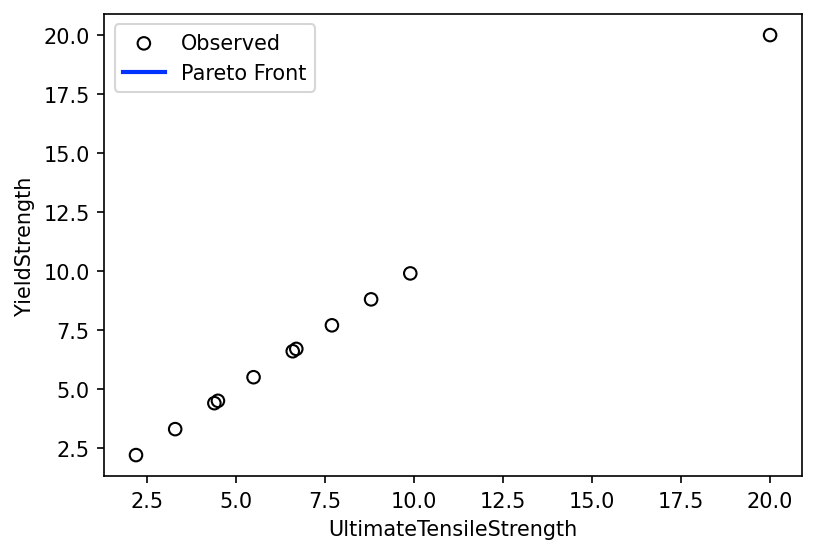

In [79]:
# Plot results
objectives = ax_client.objective_names
df = ax_client.get_trials_data_frame()

fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
pareto = ax_client.get_pareto_optimal_parameters(use_model_predictions=False)
pareto_data = [p[1][0] for p in pareto.values()]
pareto = pd.DataFrame(pareto_data).sort_values(objectives[0])

ax.scatter(df[objectives[0]], df[objectives[1]], fc="None", ec="k", label="Observed")
ax.plot(
    pareto[objectives[0]],
    pareto[objectives[1]],
    color="#0033FF",
    lw=2,
    label="Pareto Front",
)
ax.set_xlabel(objectives[0])
ax.set_ylabel(objectives[1])

ax.legend()
plt.show()